In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None) #Seeing all columns in dataframe

In [5]:
df=pd.read_csv(r"C:\Users\ADMIN\Desktop\IMAGE CLASSIFICATION USING CNN KERAS\L\-kaggle_competitions-main\Data_analysis lifecylce\test.csv")

In [6]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [7]:
categorical_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']
for feature in categorical_nan:
    print('{}: missing value {}%'.format(feature,np.round(df[feature].isnull().mean()*100,4)))

MSZoning: missing value 0.2742%
Alley: missing value 92.6662%
Utilities: missing value 0.1371%
MasVnrType: missing value 1.0966%
BsmtQual: missing value 3.0158%
BsmtCond: missing value 3.0843%
BsmtExposure: missing value 3.0158%
BsmtFinType1: missing value 2.8787%
BsmtFinType2: missing value 2.8787%
Functional: missing value 0.1371%
FireplaceQu: missing value 50.0343%
GarageType: missing value 5.209%
GarageFinish: missing value 5.3461%
GarageQual: missing value 5.3461%
GarageCond: missing value 5.3461%
PoolQC: missing value 99.7944%
Fence: missing value 80.1234%
MiscFeature: missing value 96.5045%


In [8]:
def replace_missing_values_cat(df,categorical_nan):
    df1=df.copy()
    df1[categorical_nan]=df1[categorical_nan].fillna('missing')
    return df1

df=replace_missing_values_cat(df,categorical_nan)
df[categorical_nan].isnull().sum()  #after calling the function all nan value has been removed

MSZoning        0
Alley           0
Utilities       0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [9]:
numerical_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']
for feature in numerical_nan:
    print('{}: missing value {}%'.format(feature,np.round(df[feature].isnull().mean()*100,4)))

LotFrontage: missing value 15.5586%
MasVnrArea: missing value 1.0281%
BsmtFullBath: missing value 0.1371%
BsmtHalfBath: missing value 0.1371%
GarageYrBlt: missing value 5.3461%


In [10]:
def replace_missing_values_numerical(numerical_nan):

    for feature in numerical_nan:
        median_value=df[feature].median()
        ### The null value will be replaced by 1 and other values will be replaced by 0
        df[feature+'nan']=np.where(df[feature].isnull(),1,0) 
        df[feature].fillna(median_value,inplace=True)
    

    

In [11]:
replace_missing_values_numerical(numerical_nan)
df[numerical_nan].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
dtype: int64

In [12]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461,20,RH,80.0,11622,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,missing,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,missing,MnPrv,missing,0,6,2010,WD,Normal,0,0,0,0,0
1,1462,20,RL,81.0,14267,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,missing,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,missing,missing,Gar2,12500,6,2010,WD,Normal,0,0,0,0,0
2,1463,60,RL,74.0,13830,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,missing,MnPrv,missing,0,3,2010,WD,Normal,0,0,0,0,0
3,1464,60,RL,78.0,9978,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,missing,missing,missing,0,6,2010,WD,Normal,0,0,0,0,0
4,1465,120,RL,43.0,5005,Pave,missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,missing,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,missing,missing,missing,0,1,2010,WD,Normal,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,missing,missing,1979.0,missing,0.0,0.0,missing,missing,Y,0,0,0,0,0,0,missing,missing,missing,0,6,2006,WD,Normal,0,0,0,0,1
1455,2916,160,RM,21.0,1894,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,missing,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,missing,missing,missing,0,4,2006,WD,Abnorml,0,0,0,0,0
1456,2917,20,RL,160.0,20000,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,T

In [13]:
df['GarageYrBlt']=df['GarageYrBlt'].astype('int64')
df.loc[(df['GarageYrBltnan'] == 1) , 'GarageYrBlt']

53      1979
71      1979
79      1979
92      1979
96      1979
        ... 
1433    1979
1449    1979
1453    1979
1454    1979
1457    1979
Name: GarageYrBlt, Length: 78, dtype: int64

In [14]:
temportal_feature=[feature for feature in df.columns if 'Yr'in feature or 'Year' in feature]
temportal_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'GarageYrBltnan']

In [15]:
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    df[feature]=df['YrSold']-df[feature]

In [16]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461,20,RH,80.0,11622,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,missing,Attchd,49,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,missing,MnPrv,missing,0,6,2010,WD,Normal,0,0,0,0,0
1,1462,20,RL,81.0,14267,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,missing,Attchd,52,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,missing,missing,Gar2,12500,6,2010,WD,Normal,0,0,0,0,0
2,1463,60,RL,74.0,13830,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,13,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,missing,MnPrv,missing,0,3,2010,WD,Normal,0,0,0,0,0
3,1464,60,RL,78.0,9978,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,12,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,missing,missing,missing,0,6,2010,WD,Normal,0,0,0,0,0
4,1465,120,RL,43.0,5005,Pave,missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,missing,Attchd,18,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,missing,missing,missing,0,1,2010,WD,Normal,0,0,0,0,0


In [17]:
df[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']]

,YearBuilt,YearRemodAdd,GarageYrBlt
0,49,49,49
1,52,52,52
2,13,12,13
3,12,12,12
4,18,18,18
...,...,...,...
1454,36,36,27
1455,36,36,36
1456,46,10,46
1457,14,14,27


In [18]:
numerical_feature=[feature for feature in df.columns if df[feature].dtypes!='O']
numerical_feature

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'LotFrontagenan',
 'MasVnrAreanan',
 'BsmtFullBathnan',
 'BsmtHalfBathnan',
 'GarageYrBltnan']

In [19]:
continuous_feature=[feature for feature in numerical_feature if len(df[feature].unique())>25 and feature not in temportal_feature+ ['Id']+['SalePrice']]   
continuous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal']

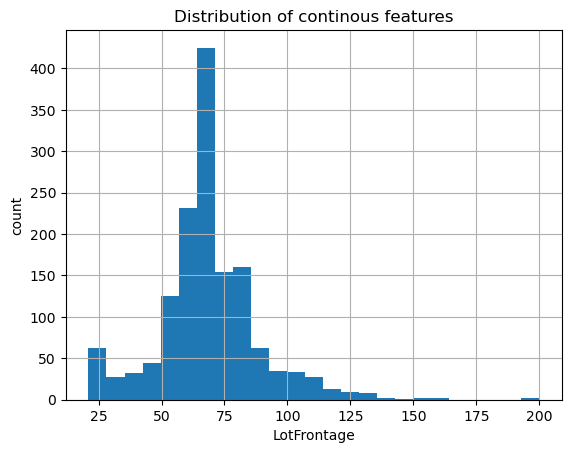

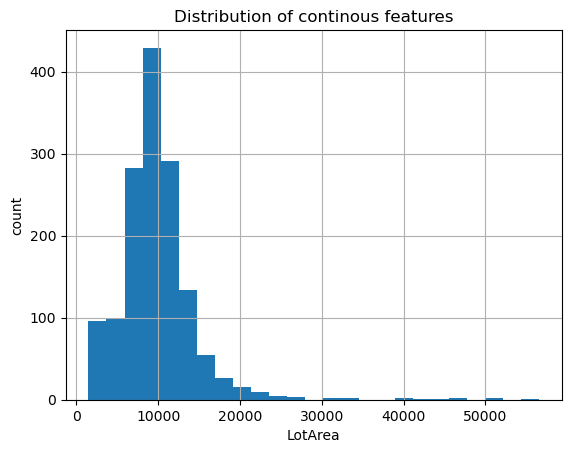

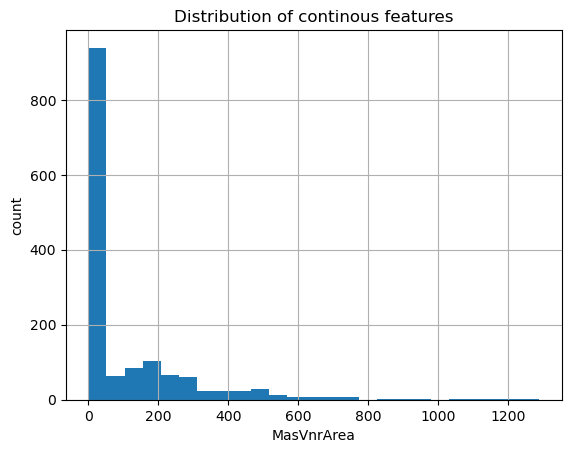

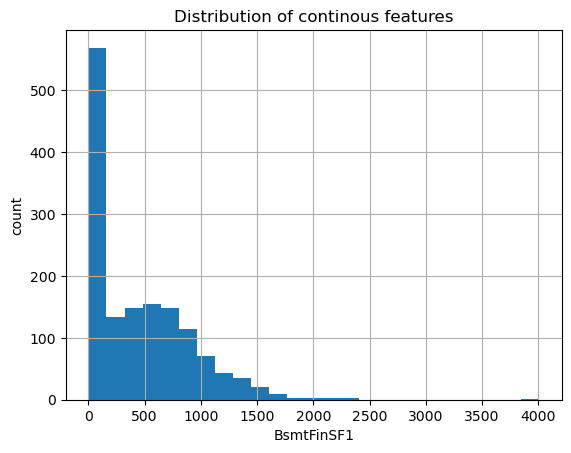

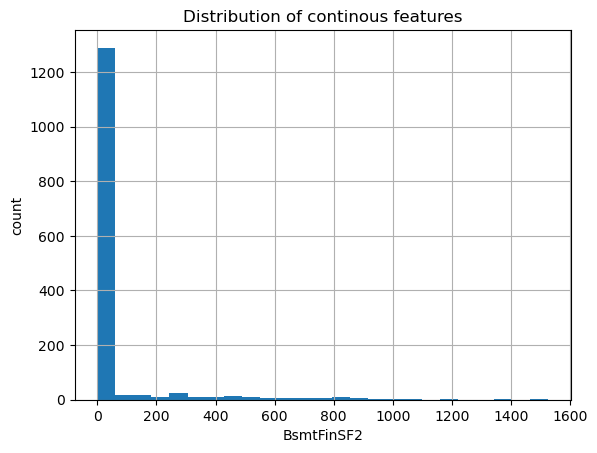

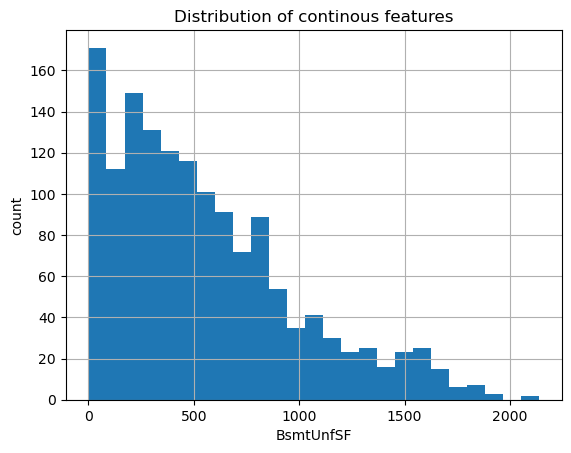

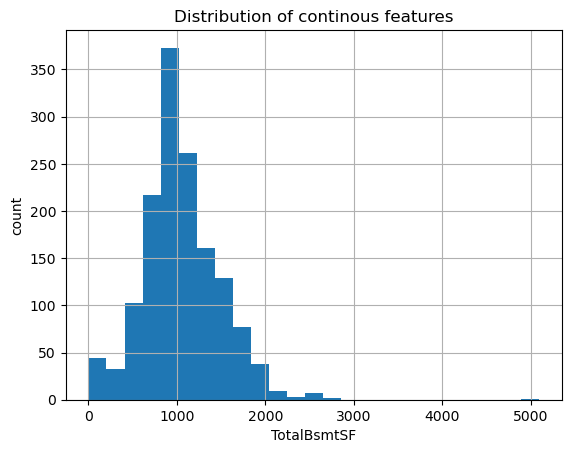

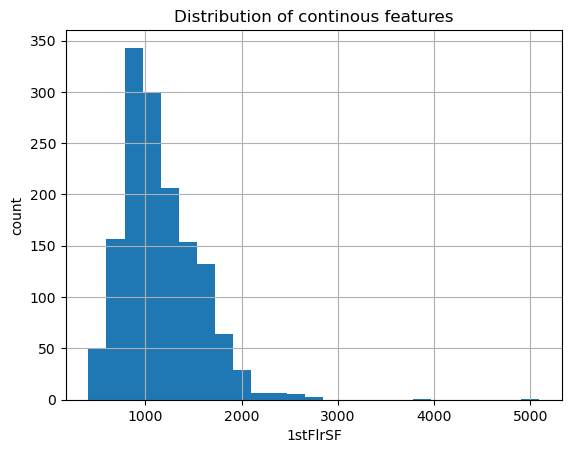

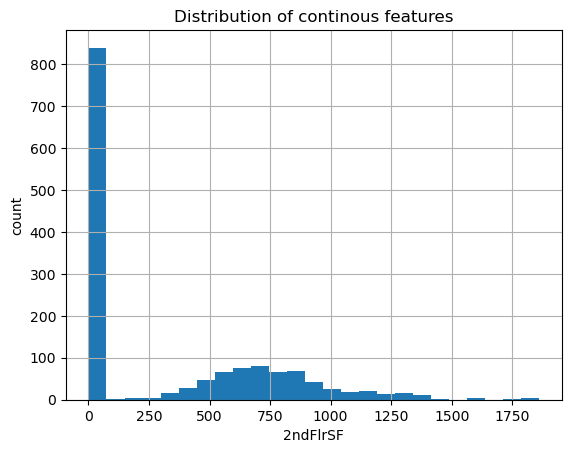

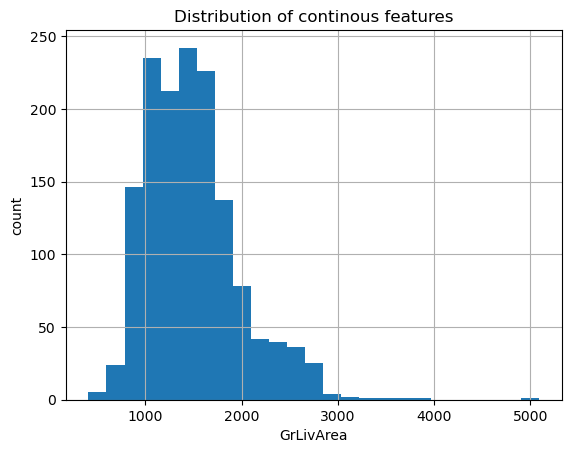

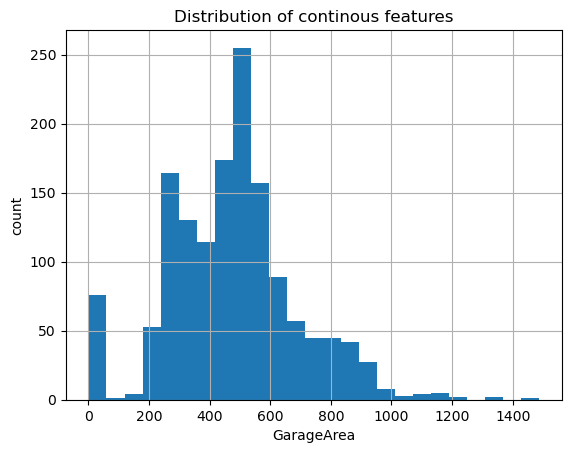

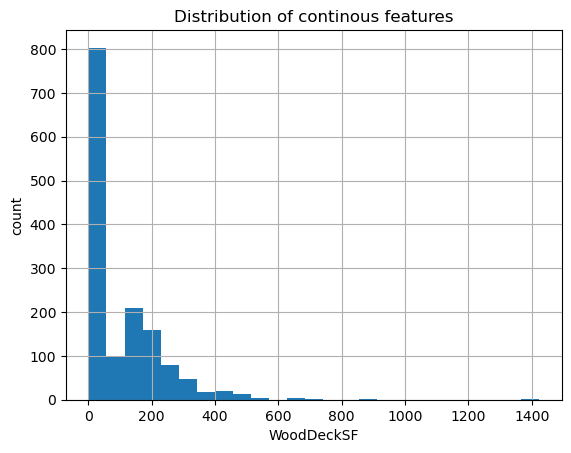

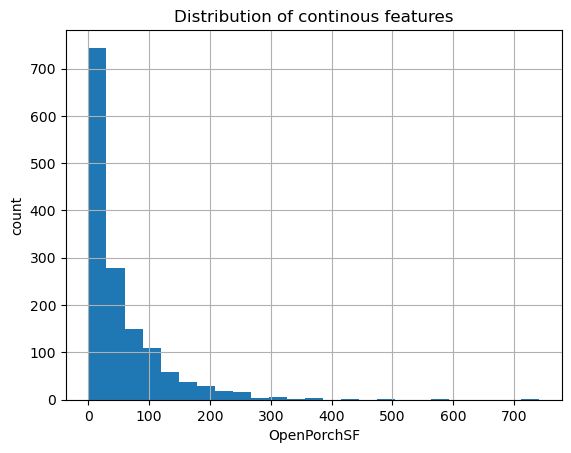

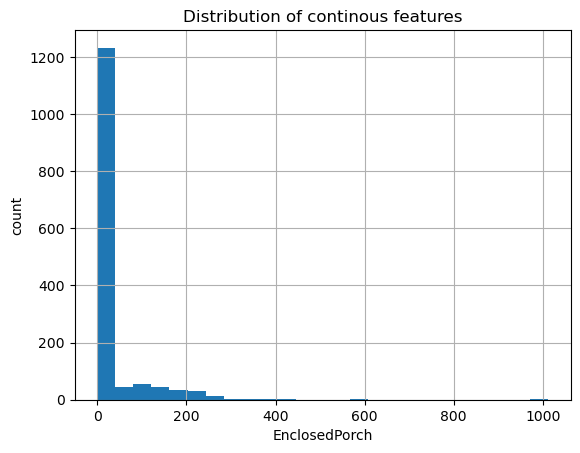

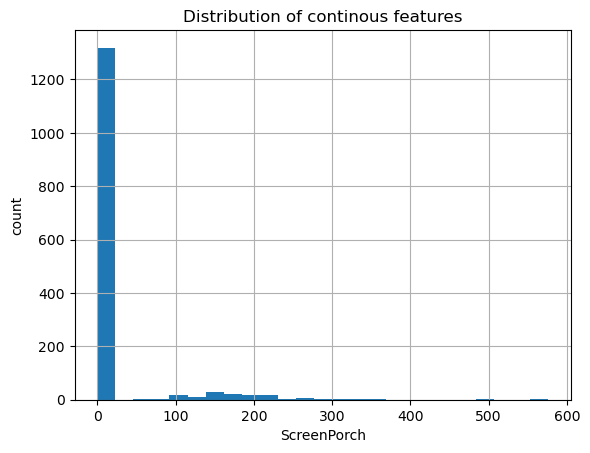

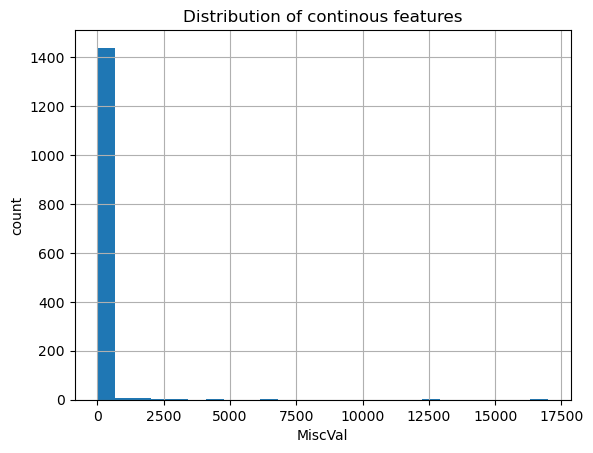

In [20]:
df1=df.copy()
for feature in continuous_feature: 
    df1[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title('Distribution of continous features')
    plt.show()

LotFrontage


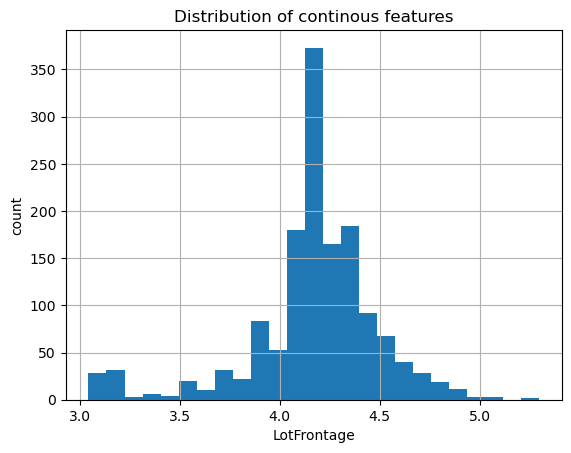

LotArea


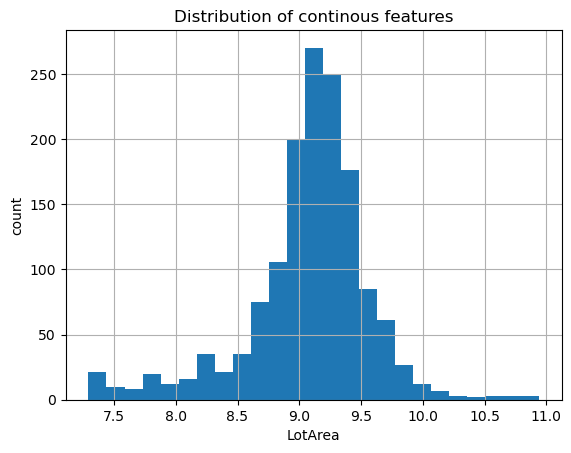

1stFlrSF


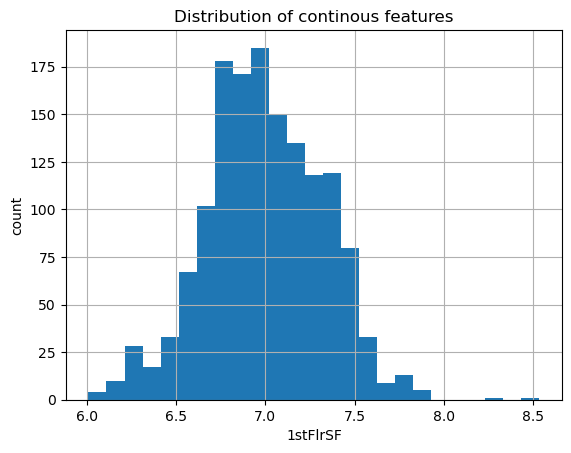

GrLivArea


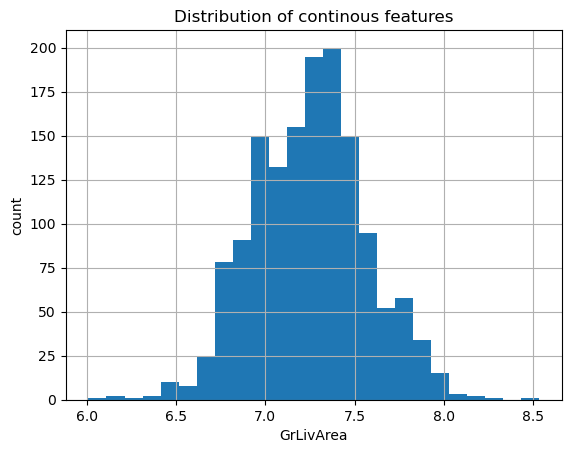

In [21]:
for feature in continuous_feature:
   
    
    if 0 in df[feature].unique():
        pass
    else:
        print(feature)
        df[feature]=np.log(df[feature])
        df[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel('count')
        plt.title('Distribution of continous features')
        plt.show()

In [22]:
categorical_feature=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [23]:
for feature in categorical_feature:
    temp=df.groupby(feature)['Id'].count()/len(df) ##Calculation the number of ID records based on a particular value (parcentage)
    temp_df=temp[temp>0.01].index
    df[feature]=np.where(df[feature].isin(temp_df),df[feature],'rare')
    

In [24]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
                  ..
LotFrontagenan     0
MasVnrAreanan      0
BsmtFullBathnan    0
BsmtHalfBathnan    0
GarageYrBltnan     0
Length: 85, dtype: int64

In [25]:
df['MSZoning'].unique()

array(['rare', 'RL', 'RM', 'FV', 'C (all)'], dtype=object)

Load the value of categorical feature

In [26]:
import json
f = open('categorical_value_mapping_with_feature.json','r')
data_mapping = json.load(f)

# Mapping the value of categorical features

In [27]:
data_mapping

[{'MSZoning': {'rare': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4}},
 {'Street': {'rare': 0, 'Pave': 1}},
 {'Alley': {'Grvl': 0, 'Pave': 1, 'missing': 2}},
 {'LotShape': {'Reg': 0, 'IR1': 1, 'rare': 2, 'IR2': 3}},
 {'LandContour': {'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3}},
 {'Utilities': {'rare': 0, 'AllPub': 1}},
 {'LotConfig': {'Inside': 0, 'FR2': 1, 'Corner': 2, 'rare': 3, 'CulDSac': 4}},
 {'LandSlope': {'Gtl': 0, 'Mod': 1, 'rare': 2}},
 {'Neighborhood': {'MeadowV': 0,
   'IDOTRR': 1,
   'BrDale': 2,
   'BrkSide': 3,
   'Edwards': 4,
   'OldTown': 5,
   'Sawyer': 6,
   'SWISU': 7,
   'NAmes': 8,
   'Mitchel': 9,
   'SawyerW': 10,
   'NWAmes': 11,
   'rare': 12,
   'Gilbert': 13,
   'Blmngtn': 14,
   'CollgCr': 15,
   'Crawfor': 16,
   'ClearCr': 17,
   'Somerst': 18,
   'Timber': 19,
   'StoneBr': 20,
   'NridgHt': 21,
   'NoRidge': 22}},
 {'Condition1': {'Artery': 0,
   'Feedr': 1,
   'rare': 2,
   'RRAn': 3,
   'Norm': 4,
   'PosN': 5}},
 {'Condition2': {'rare': 0, 'Norm': 1}},
 {'Bldg

In [28]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461,20,rare,4.382027,9.360655,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,TA,5,Typ,0,missing,Attchd,49,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,missing,MnPrv,missing,0,6,2010,WD,Normal,0,0,0,0,0
1,1462,20,RL,4.394449,9.565704,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,Gd,6,Typ,0,missing,Attchd,52,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,missing,missing,rare,12500,6,2010,WD,Normal,0,0,0,0,0
2,1463,60,RL,4.304065,9.534595,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,13,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,missing,MnPrv,missing,0,3,2010,WD,Normal,0,0,0,0,0
3,1464,60,RL,4.356709,9.208138,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,12,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,missing,missing,missing,0,6,2010,WD,Normal,0,0,0,0,0
4,1465,120,RL,3.761200,8.518193,Pave,missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,Gd,5,Typ,0,missing,Attchd,18,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,missing,missing,missing,0,1,2010,WD,Normal,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,3.044522,7.568379,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,36,36,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,6.302619,546,0,6.995766,0.0,0.0,1,1,3,1,TA,5,Typ,0,missing,missing,27,missing,0.0,0.0,missing,missing,Y,0,0,0,0,0,0,missing,missing,missing,0,6,2006,WD,Normal,0,0,0,0,1
1455,2916,160,RM,3.044522,7.546446,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,36,36,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,6.302619,546,0,6.995766,0.0,0.0,1,1,3,1,TA,6,Typ,0,missing,rare,36,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,missing,missing,missing,0,4,2006,WD,Abnorml,0,0,0,0,0
1456,2917,20,RL,5.075174,9.903488,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1F

In [29]:
for element in data_mapping:      # accessing the training map
    for key,value in element.items():  # 1st dictionary
        if key in categorical_feature:
            
            print("mapped value",value) 
            #print(feature_without_map_value)
            #df[key]=np.where(len(feature_without_map_value)==0,df[key].map(value),-1)  
            df[key]=df[key].map(value)
           

mapped value {'rare': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4}
mapped value {'rare': 0, 'Pave': 1}
mapped value {'Grvl': 0, 'Pave': 1, 'missing': 2}
mapped value {'Reg': 0, 'IR1': 1, 'rare': 2, 'IR2': 3}
mapped value {'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3}
mapped value {'rare': 0, 'AllPub': 1}
mapped value {'Inside': 0, 'FR2': 1, 'Corner': 2, 'rare': 3, 'CulDSac': 4}
mapped value {'Gtl': 0, 'Mod': 1, 'rare': 2}
mapped value {'MeadowV': 0, 'IDOTRR': 1, 'BrDale': 2, 'BrkSide': 3, 'Edwards': 4, 'OldTown': 5, 'Sawyer': 6, 'SWISU': 7, 'NAmes': 8, 'Mitchel': 9, 'SawyerW': 10, 'NWAmes': 11, 'rare': 12, 'Gilbert': 13, 'Blmngtn': 14, 'CollgCr': 15, 'Crawfor': 16, 'ClearCr': 17, 'Somerst': 18, 'Timber': 19, 'StoneBr': 20, 'NridgHt': 21, 'NoRidge': 22}
mapped value {'Artery': 0, 'Feedr': 1, 'rare': 2, 'RRAn': 3, 'Norm': 4, 'PosN': 5}
mapped value {'rare': 0, 'Norm': 1}
mapped value {'2fmCon': 0, 'Duplex': 1, 'Twnhs': 2, 'TwnhsE': 3, '1Fam': 4}
mapped value {'SFoyer': 0, '1.5Fin': 1, 'rare': 2, 'SL

In [30]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461,20,0.0,4.382027,9.360655,1,2,0,1,1,0,0,8,1.0,1,4,4,5,6,49,49,0,0,9,9.0,1.0,0.0,1.0,3,2,2,3,1,1,468.0,2.0,144.0,270.0,882.0,2,2,1,3,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,1.0,5,4,0,1,4.0,49,1,1.0,730.0,2,3,2,140,0,0,0,120,0,0,2,2,0,6,2010,2.0,3,0,0,0,0,0
1,1462,20,3.0,4.394449,9.565704,1,2,1,1,1,2,0,8,4.0,1,4,4,6,6,52,52,2,0,2,1.0,2.0,108.0,1.0,3,2,2,3,1,4,923.0,5.0,0.0,406.0,1329.0,2,2,1,3,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,2.0,6,4,0,1,4.0,52,1,1.0,312.0,2,3,2,393,36,0,0,0,0,0,4,1,12500,6,2010,2.0,3,0,0,0,0,0
2,1463,60,3.0,4.304065,9.534595,1,2,1,1,1,0,0,13,4.0,1,4,5,5,5,13,12,0,0,9,9.0,1.0,0.0,1.0,3,4,3,3,1,6,791.0,5.0,0.0,137.0,928.0,2,3,1,3,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,1.0,6,4,1,3,4.0,13,3,2.0,482.0,2,3,2,212,34,0,0,0,0,0,2,2,0,3,2010,2.0,3,0,0,0,0,0
3,1464,60,3.0,4.356709,9.208138,1,2,1,1,1,0,0,13,4.0,1,4,5,6,6,12,12,0,0,9,9.0,2.0,20.0,1.0,3,4,2,3,1,6,602.0,5.0,0.0,324.0,926.0,2,4,1,3,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,2.0,7,4,1,4,4.0,12,3,2.0,470.0,2,3,2,360,36,0,0,0,0,0,4,2,0,6,2010,2.0,3,0,0,0,0,0
4,1465,120,3.0,3.761200,8.518193,1,2,1,3,1,0,0,20,4.0,1,3,4,8,5,18,18,0,0,6,5.0,1.0,0.0,2.0,3,4,3,3,1,4,263.0,5.0,0.0,1017.0,1280.0,2,4,1,3,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,2.0,5,4,0,1,4.0,18,2,2.0,506.0,2,3,2,0,82,0,0,144,0,0,4,2,0,1,2010,2.0,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1.0,3.044522,7.568379,1,2,0,1,1,0,0,0,4.0,1,2,5,4,7,36,36,0,0,10,10.0,1.0,0.0,1.0,3,2,2,3,1,5,0.0,5.0,0.0,546.0,546.0,2,3,1,3,6.302619,546,0,6.995766,0.0,0.0,1,1,3,1,1.0,5,4,0,1,0.0,27,0,0.0,0.0,0,0,2,0,0,0,0,0,0,0,4,2,0,6,2006,2.0,3,0,0,0,0,1
1455,2916,160,1.0,3.044522,7.546446,1,2,0,1,1,0,0,0,4.0,1,3,5,4,5,36,36,0,0,10,10.0,1.0,0.0,1.0,3,2,2,3,1,1,252.0,5.0,0.0,294.0,546.0,2,2,1,3,6.302619,546,0,6.995766,0.0,0.0,1,1,3,1,1.0,6,4,0,1,1.0,36,1,1.0,286.0,2,3,2,0,24,0,0,0,0,0,4,2,0,4,2006,2.0,0,0,0,0,0,0
1456,2917,20,3.0,5.075174,9.903488,1,2,0,1,1,0,0,9,4.0,1,4,4,5,7,46,10,0,0,9,9.0,1.0,0.0,1.0,3,2,2,3,1,4,1224.0,5.0,0.0,0.0,1224.0,2,4,1,3,7.109879,0,0,7.109879,1.0,0.0,1,0,4,1,1.0,7,4,1,3,2.0,46,1,2.0,576.0,2,3,2,474,0,0,0,0,0,0,4,2,0,9,2006,2.0,0,0,0,0,0,0
1457,2918,85,3.0,4.127134,9.253496,1,2,0,1,1,0,0,9,4.0,1,4,0,5,5,14,14,0,0,6,4.0,1.0,0.0,1.0,3,4,3,3,3,6,337.0,5.0,0.0,575.0,912.0,2,2,1,3,6.877296,0,0,6.877296,0.0,1.0,1,0,3,1,1.0,6,4,0,1,0.0,27,0,0.0,0.0,0,0,2,80,32,0,0,0,0,0,2,0,700,7,2006,2.0,3,0,0,0,0,1


In [31]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461,20,0.0,4.382027,9.360655,1,2,0,1,1,0,0,8,1.0,1,4,4,5,6,49,49,0,0,9,9.0,1.0,0.0,1.0,3,2,2,3,1,1,468.0,2.0,144.0,270.0,882.0,2,2,1,3,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,1.0,5,4,0,1,4.0,49,1,1.0,730.0,2,3,2,140,0,0,0,120,0,0,2,2,0,6,2010,2.0,3,0,0,0,0,0
1,1462,20,3.0,4.394449,9.565704,1,2,1,1,1,2,0,8,4.0,1,4,4,6,6,52,52,2,0,2,1.0,2.0,108.0,1.0,3,2,2,3,1,4,923.0,5.0,0.0,406.0,1329.0,2,2,1,3,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,2.0,6,4,0,1,4.0,52,1,1.0,312.0,2,3,2,393,36,0,0,0,0,0,4,1,12500,6,2010,2.0,3,0,0,0,0,0
2,1463,60,3.0,4.304065,9.534595,1,2,1,1,1,0,0,13,4.0,1,4,5,5,5,13,12,0,0,9,9.0,1.0,0.0,1.0,3,4,3,3,1,6,791.0,5.0,0.0,137.0,928.0,2,3,1,3,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,1.0,6,4,1,3,4.0,13,3,2.0,482.0,2,3,2,212,34,0,0,0,0,0,2,2,0,3,2010,2.0,3,0,0,0,0,0
3,1464,60,3.0,4.356709,9.208138,1,2,1,1,1,0,0,13,4.0,1,4,5,6,6,12,12,0,0,9,9.0,2.0,20.0,1.0,3,4,2,3,1,6,602.0,5.0,0.0,324.0,926.0,2,4,1,3,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,2.0,7,4,1,4,4.0,12,3,2.0,470.0,2,3,2,360,36,0,0,0,0,0,4,2,0,6,2010,2.0,3,0,0,0,0,0
4,1465,120,3.0,3.761200,8.518193,1,2,1,3,1,0,0,20,4.0,1,3,4,8,5,18,18,0,0,6,5.0,1.0,0.0,2.0,3,4,3,3,1,4,263.0,5.0,0.0,1017.0,1280.0,2,4,1,3,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,2.0,5,4,0,1,4.0,18,2,2.0,506.0,2,3,2,0,82,0,0,144,0,0,4,2,0,1,2010,2.0,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1.0,3.044522,7.568379,1,2,0,1,1,0,0,0,4.0,1,2,5,4,7,36,36,0,0,10,10.0,1.0,0.0,1.0,3,2,2,3,1,5,0.0,5.0,0.0,546.0,546.0,2,3,1,3,6.302619,546,0,6.995766,0.0,0.0,1,1,3,1,1.0,5,4,0,1,0.0,27,0,0.0,0.0,0,0,2,0,0,0,0,0,0,0,4,2,0,6,2006,2.0,3,0,0,0,0,1
1455,2916,160,1.0,3.044522,7.546446,1,2,0,1,1,0,0,0,4.0,1,3,5,4,5,36,36,0,0,10,10.0,1.0,0.0,1.0,3,2,2,3,1,1,252.0,5.0,0.0,294.0,546.0,2,2,1,3,6.302619,546,0,6.995766,0.0,0.0,1,1,3,1,1.0,6,4,0,1,1.0,36,1,1.0,286.0,2,3,2,0,24,0,0,0,0,0,4,2,0,4,2006,2.0,0,0,0,0,0,0
1456,2917,20,3.0,5.075174,9.903488,1,2,0,1,1,0,0,9,4.0,1,4,4,5,7,46,10,0,0,9,9.0,1.0,0.0,1.0,3,2,2,3,1,4,1224.0,5.0,0.0,0.0,1224.0,2,4,1,3,7.109879,0,0,7.109879,1.0,0.0,1,0,4,1,1.0,7,4,1,3,2.0,46,1,2.0,576.0,2,3,2,474,0,0,0,0,0,0,4,2,0,9,2006,2.0,0,0,0,0,0,0
1457,2918,85,3.0,4.127134,9.253496,1,2,0,1,1,0,0,9,4.0,1,4,0,5,5,14,14,0,0,6,4.0,1.0,0.0,1.0,3,4,3,3,3,6,337.0,5.0,0.0,575.0,912.0,2,2,1,3,6.877296,0,0,6.877296,0.0,1.0,1,0,3,1,1.0,6,4,0,1,0.0,27,0,0.0,0.0,0,0,2,80,32,0,0,0,0,0,2,0,700,7,2006,2.0,3,0,0,0,0,1


In [32]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning           15
LotFrontage         0
LotArea             0
                   ..
LotFrontagenan      0
MasVnrAreanan       0
BsmtFullBathnan     0
BsmtHalfBathnan     0
GarageYrBltnan      0
Length: 85, dtype: int64

Dropped those features which are not in train data

In [36]:
train_data=pd.read_csv(r"C:\Users\ADMIN\Desktop\IMAGE CLASSIFICATION USING CNN KERAS\L\-kaggle_competitions-main\Data_analysis lifecylce\feature_reduction.csv")

In [37]:
trained_feature=train_data.columns   ###features that had been used for training

In [38]:
dropped_column=[feature for feature in df.columns if feature not in trained_feature]
dropped_column    ###these features will be removed from test dataset as they havents used for training

['Id',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition2',
 'OverallQual',
 'OverallCond',
 'RoofMatl',
 'MasVnrArea',
 'BsmtCond',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 'Heating',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Functional',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'MiscFeature',
 'MiscVal',
 'SaleType',
 'MasVnrAreanan',
 'BsmtFullBathnan',
 'BsmtHalfBathnan',
 'GarageYrBltnan']

In [39]:
df1=df.copy()

In [40]:
df.drop(dropped_column,axis=1,inplace=True)   #### processed test data

In [41]:
df

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,HeatingQC,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,WoodDeckSF,Fence,MoSold,YrSold,SaleCondition,LotFrontagenan
0,20,0.0,0,0,8,1.0,4,4,49,49,0,9,9.0,1.0,1.0,3,2,2,1,1,2.0,270.0,2,0,0.0,1,0,1.0,0,1,4.0,49,1,1.0,140,2,6,2010,3,0
1,20,3.0,1,2,8,4.0,4,4,52,52,2,2,1.0,2.0,1.0,3,2,2,1,4,5.0,406.0,2,0,0.0,1,1,2.0,0,1,4.0,52,1,1.0,393,4,6,2010,3,0
2,60,3.0,1,0,13,4.0,4,5,13,12,0,9,9.0,1.0,1.0,3,4,3,1,6,5.0,137.0,3,701,0.0,2,1,1.0,1,3,4.0,13,3,2.0,212,2,3,2010,3,0
3,60,3.0,1,0,13,4.0,4,5,12,12,0,9,9.0,2.0,1.0,3,4,2,1,6,5.0,324.0,4,678,0.0,2,1,2.0,1,4,4.0,12,3,2.0,360,4,6,2010,3,0
4,120,3.0,1,0,20,4.0,3,4,18,18,0,6,5.0,1.0,2.0,3,4,3,1,4,5.0,1017.0,4,0,0.0,2,0,2.0,0,1,4.0,18,2,2.0,0,4,1,2010,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1.0,0,0,0,4.0,2,5,36,36,0,10,10.0,1.0,1.0,3,2,2,1,5,5.0,546.0,3,546,0.0,1,1,1.0,0,1,0.0,27,0,0.0,0,4,6,2006,3,0
1455,160,1.0,0,0,0,4.0,3,5,36,36,0,10,10.0,1.0,1.0,3,2,2,1,1,5.0,294.0,2,546,0.0,1,1,1.0,0,1,1.0,36,1,1.0,0,4,4,2006,0,0
1456,20,3.0,0,0,9,4.0,4,4,46,10,0,9,9.0,1.0,1.0,3,2,2,1,4,5.0,0.0,4,0,1.0,1,0,1.0,1,3,2.0,46,1,2.0,474,4,9,2006,0,0
1457,85,3.0,0,0,9,4.0,4,0,14,14,0,6,4.0,1.0,1.0,3,4,3,3,6,5.0,575.0,2,0,0.0,1,0,1.0,0,1,0.0,27,0,0.0,80,2,7,2006,3,0


Replacing all nan values with -1

In [42]:
df = df.replace(np.nan, -1)

In [43]:
df.isnull().sum()

MSSubClass        0
MSZoning          0
LotShape          0
LotConfig         0
Neighborhood      0
Condition1        0
BldgType          0
HouseStyle        0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinType2      0
BsmtUnfSF         0
HeatingQC         0
2ndFlrSF          0
BsmtFullBath      0
FullBath          0
HalfBath          0
KitchenQual       0
Fireplaces        0
FireplaceQu       0
GarageType        0
GarageYrBlt       0
GarageFinish      0
GarageCars        0
WoodDeckSF        0
Fence             0
MoSold            0
YrSold            0
SaleCondition     0
LotFrontagenan    0
dtype: int64

In [44]:
df.loc[(df['MSZoning'] == -1) , 'MSZoning']

98     -1.0
142    -1.0
359    -1.0
362    -1.0
453    -1.0
757    -1.0
758    -1.0
759    -1.0
1119   -1.0
1120   -1.0
1121   -1.0
1331   -1.0
1431   -1.0
1432   -1.0
1433   -1.0
Name: MSZoning, dtype: float64

# Feature scaling

In [45]:
columns=df.columns.to_list()

In [46]:
trained_feature

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtUnfSF', 'HeatingQC', '2ndFlrSF', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'KitchenQual', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'WoodDeckSF',
       'Fence', 'MoSold', 'YrSold', 'SaleCondition', 'LotFrontagenan',
       'SalePrice'],
      dtype='object')

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[columns])
df[columns]=scaler.transform(df[columns])

In [48]:
df

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,HeatingQC,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,WoodDeckSF,Fence,MoSold,YrSold,SaleCondition,LotFrontagenan
0,0.000000,0.2,0.000000,0.0,0.363636,0.333333,1.00,0.8,0.384615,0.822581,0.0,0.9,0.909091,0.4,0.50,1.0,0.5,0.50,0.25,0.166667,0.428571,0.126576,0.50,0.000000,0.000000,0.25,0.0,0.50,0.00,0.2,0.833333,0.792994,0.333333,0.333333,0.098315,0.5,0.454545,1.0,0.75,0.0
1,0.000000,0.8,0.333333,0.5,0.363636,0.833333,1.00,0.8,0.407692,0.870968,1.0,0.2,0.181818,0.6,0.50,1.0,0.5,0.50,0.25,0.666667,0.857143,0.190098,0.50,0.000000,0.000000,0.25,0.5,0.75,0.00,0.2,0.833333,0.802548,0.333333,0.333333,0.275983,1.0,0.454545,1.0,0.75,0.0
2,0.235294,0.8,0.333333,0.0,0.590909,0.833333,1.00,1.0,0.107692,0.225806,0.0,0.9,0.909091,0.4,0.50,1.0,1.0,0.75,0.25,1.000000,0.857143,0.064456,0.75,0.376477,0.000000,0.50,0.5,0.50,0.25,0.6,0.833333,0.678344,1.000000,0.500000,0.148876,0.5,0.181818,1.0,0.75,0.0
3,0.235294,0.8,0.333333,0.0,0.590909,0.833333,1.00,1.0,0.100000,0.225806,0.0,0.9,0.909091,0.6,0.50,1.0,1.0,0.50,0.25,1.000000,0.857143,0.151798,1.00,0.364125,0.000000,0.50,0.5,0.75,0.25,0.8,0.833333,0.675159,1.000000,0.500000,0.252809,1.0,0.454545,1.0,0.75,0.0
4,0.588235,0.8,0.333333,0.0,0.909091,0.833333,0.75,0.8,0.146154,0.322581,0.0,0.6,0.545455,0.4,0.75,1.0,1.0,0.75,0.25,0.666667,0.857143,0.475479,1.00,0.000000,0.000000,0.50,0.0,0.75,0.00,0.2,0.833333,0.694268,0.666667,0.500000,0.000000,1.0,0.000000,1.0,0.75,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.823529,0.4,0.000000,0.0,0.000000,0.833333,0.50,1.0,0.284615,0.612903,0.0,1.0,1.000000,0.4,0.50,1.0,0.5,0.50,0.25,0.833333,0.857143,0.255488,0.75,0.293233,0.000000,0.25,0.5,0.50,0.00,0.2,0.166667,0.722930,0.000000,0.166667,0.000000,1.0,0.454545,0.0,0.75,0.0
1455,0.823529,0.4,0.000000,0.0,0.000000,0.833333,0.75,1.0,0.284615,0.612903,0.0,1.0,1.000000,0.4,0.50,1.0,0.5,0.50,0.25,0.166667,0.857143,0.137786,0.50,0.293233,0.000000,0.25,0.5,0.50,0.00,0.2,0.333333,0.751592,0.333333,0.333333,0.000000,1.0,0.272727,0.0,0.00,0.0
1456,0.000000,0.8,0.000000,0.0,0.409091,0.833333,1.00,0.8,0.361538,0.193548,0.0,0.9,0.909091,0.4,0.50,1.0,0.5,0.50,0.25,0.666667,0.857143,0.000467,1.00,0.000000,0.333333,0.25,0.0,0.50,0.25,0.6,0.500000,0.783439,0.333333,0.500000,0.332865,1.0,0.727273,0.0,0.00,0.0
1457,0.382353,0.8,0.000000,0.0,0.409091,0.833333,1.00,0.0,0.115385,0.258065,0.0,0.6,0.454545,0.4,0.50,1.0,1.0,0.75,0.75,1.000000,0.857143,0.269033,0.50,0.000000,0.000000,0.25,0.0,0.50,0.00,0.2,0.166667,0.722930,0.000000,0.166667,0.056180,0.5,0.545455,0.0,0.75,0.0


In [49]:
df[columns].isnull().sum()

MSSubClass        0
MSZoning          0
LotShape          0
LotConfig         0
Neighborhood      0
Condition1        0
BldgType          0
HouseStyle        0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinType2      0
BsmtUnfSF         0
HeatingQC         0
2ndFlrSF          0
BsmtFullBath      0
FullBath          0
HalfBath          0
KitchenQual       0
Fireplaces        0
FireplaceQu       0
GarageType        0
GarageYrBlt       0
GarageFinish      0
GarageCars        0
WoodDeckSF        0
Fence             0
MoSold            0
YrSold            0
SaleCondition     0
LotFrontagenan    0
dtype: int64

# Predecting outputs

In [50]:
import pickle
pickled_model = pickle.load(open('randorm_forest_model.pkl', 'rb'))
predicted_price=pickled_model.predict(df)

In [51]:
predicted_price

array([125770.33333333, 138478.        , 177401.28666667, ...,
       156791.74      , 139554.66666667, 200594.88      ])

In [52]:
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461,20,0.0,4.382027,9.360655,1,2,0,1,1,0,0,8,1.0,1,4,4,5,6,49,49,0,0,9,9.0,1.0,0.0,1.0,3,2,2,3,1,1,468.0,2.0,144.0,270.0,882.0,2,2,1,3,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,1.0,5,4,0,1,4.0,49,1,1.0,730.0,2,3,2,140,0,0,0,120,0,0,2,2,0,6,2010,2.0,3,0,0,0,0,0
1,1462,20,3.0,4.394449,9.565704,1,2,1,1,1,2,0,8,4.0,1,4,4,6,6,52,52,2,0,2,1.0,2.0,108.0,1.0,3,2,2,3,1,4,923.0,5.0,0.0,406.0,1329.0,2,2,1,3,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,2.0,6,4,0,1,4.0,52,1,1.0,312.0,2,3,2,393,36,0,0,0,0,0,4,1,12500,6,2010,2.0,3,0,0,0,0,0
2,1463,60,3.0,4.304065,9.534595,1,2,1,1,1,0,0,13,4.0,1,4,5,5,5,13,12,0,0,9,9.0,1.0,0.0,1.0,3,4,3,3,1,6,791.0,5.0,0.0,137.0,928.0,2,3,1,3,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,1.0,6,4,1,3,4.0,13,3,2.0,482.0,2,3,2,212,34,0,0,0,0,0,2,2,0,3,2010,2.0,3,0,0,0,0,0
3,1464,60,3.0,4.356709,9.208138,1,2,1,1,1,0,0,13,4.0,1,4,5,6,6,12,12,0,0,9,9.0,2.0,20.0,1.0,3,4,2,3,1,6,602.0,5.0,0.0,324.0,926.0,2,4,1,3,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,2.0,7,4,1,4,4.0,12,3,2.0,470.0,2,3,2,360,36,0,0,0,0,0,4,2,0,6,2010,2.0,3,0,0,0,0,0
4,1465,120,3.0,3.761200,8.518193,1,2,1,3,1,0,0,20,4.0,1,3,4,8,5,18,18,0,0,6,5.0,1.0,0.0,2.0,3,4,3,3,1,4,263.0,5.0,0.0,1017.0,1280.0,2,4,1,3,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,2.0,5,4,0,1,4.0,18,2,2.0,506.0,2,3,2,0,82,0,0,144,0,0,4,2,0,1,2010,2.0,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1.0,3.044522,7.568379,1,2,0,1,1,0,0,0,4.0,1,2,5,4,7,36,36,0,0,10,10.0,1.0,0.0,1.0,3,2,2,3,1,5,0.0,5.0,0.0,546.0,546.0,2,3,1,3,6.302619,546,0,6.995766,0.0,0.0,1,1,3,1,1.0,5,4,0,1,0.0,27,0,0.0,0.0,0,0,2,0,0,0,0,0,0,0,4,2,0,6,2006,2.0,3,0,0,0,0,1
1455,2916,160,1.0,3.044522,7.546446,1,2,0,1,1,0,0,0,4.0,1,3,5,4,5,36,36,0,0,10,10.0,1.0,0.0,1.0,3,2,2,3,1,1,252.0,5.0,0.0,294.0,546.0,2,2,1,3,6.302619,546,0,6.995766,0.0,0.0,1,1,3,1,1.0,6,4,0,1,1.0,36,1,1.0,286.0,2,3,2,0,24,0,0,0,0,0,4,2,0,4,2006,2.0,0,0,0,0,0,0
1456,2917,20,3.0,5.075174,9.903488,1,2,0,1,1,0,0,9,4.0,1,4,4,5,7,46,10,0,0,9,9.0,1.0,0.0,1.0,3,2,2,3,1,4,1224.0,5.0,0.0,0.0,1224.0,2,4,1,3,7.109879,0,0,7.109879,1.0,0.0,1,0,4,1,1.0,7,4,1,3,2.0,46,1,2.0,576.0,2,3,2,474,0,0,0,0,0,0,4,2,0,9,2006,2.0,0,0,0,0,0,0
1457,2918,85,3.0,4.127134,9.253496,1,2,0,1,1,0,0,9,4.0,1,4,0,5,5,14,14,0,0,6,4.0,1.0,0.0,1.0,3,4,3,3,3,6,337.0,5.0,0.0,575.0,912.0,2,2,1,3,6.877296,0,0,6.877296,0.0,1.0,1,0,3,1,1.0,6,4,0,1,0.0,27,0,0.0,0.0,0,0,2,80,32,0,0,0,0,0,2,0,700,7,2006,2.0,3,0,0,0,0,1


In [53]:
submission=pd.DataFrame({"Id":df1['Id'],"SalePrice":np.squeeze(predicted_price)
    
})

In [54]:
submission

,Id,SalePrice
0,1461,125770.333333
1,1462,138478.000000
2,1463,177401.286667
3,1464,191251.400000
4,1465,183557.600000
...,...,...
1454,2915,109761.606667
1455,2916,111867.333333
1456,2917,156791.740000
1457,2918,139554.666667


In [55]:
submission.to_csv('submission1.csv',index=False)